In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

import warnings 
warnings.filterwarnings("ignore")

In [70]:
df = pd.read_csv(r"C:\Users\prito\OneDrive\Desktop\Practice Sheet.csv")
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,26.0,4,97.0,46,1835,20.5,70,2
1,26.0,4,97.0,46,1950,21.0,73,2
2,43.1,4,90.0,48,1985,21.5,78,2
3,44.3,4,90.0,48,2085,21.7,80,2
4,43.4,4,90.0,48,2335,23.7,80,2


In [72]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 24.6 KB


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


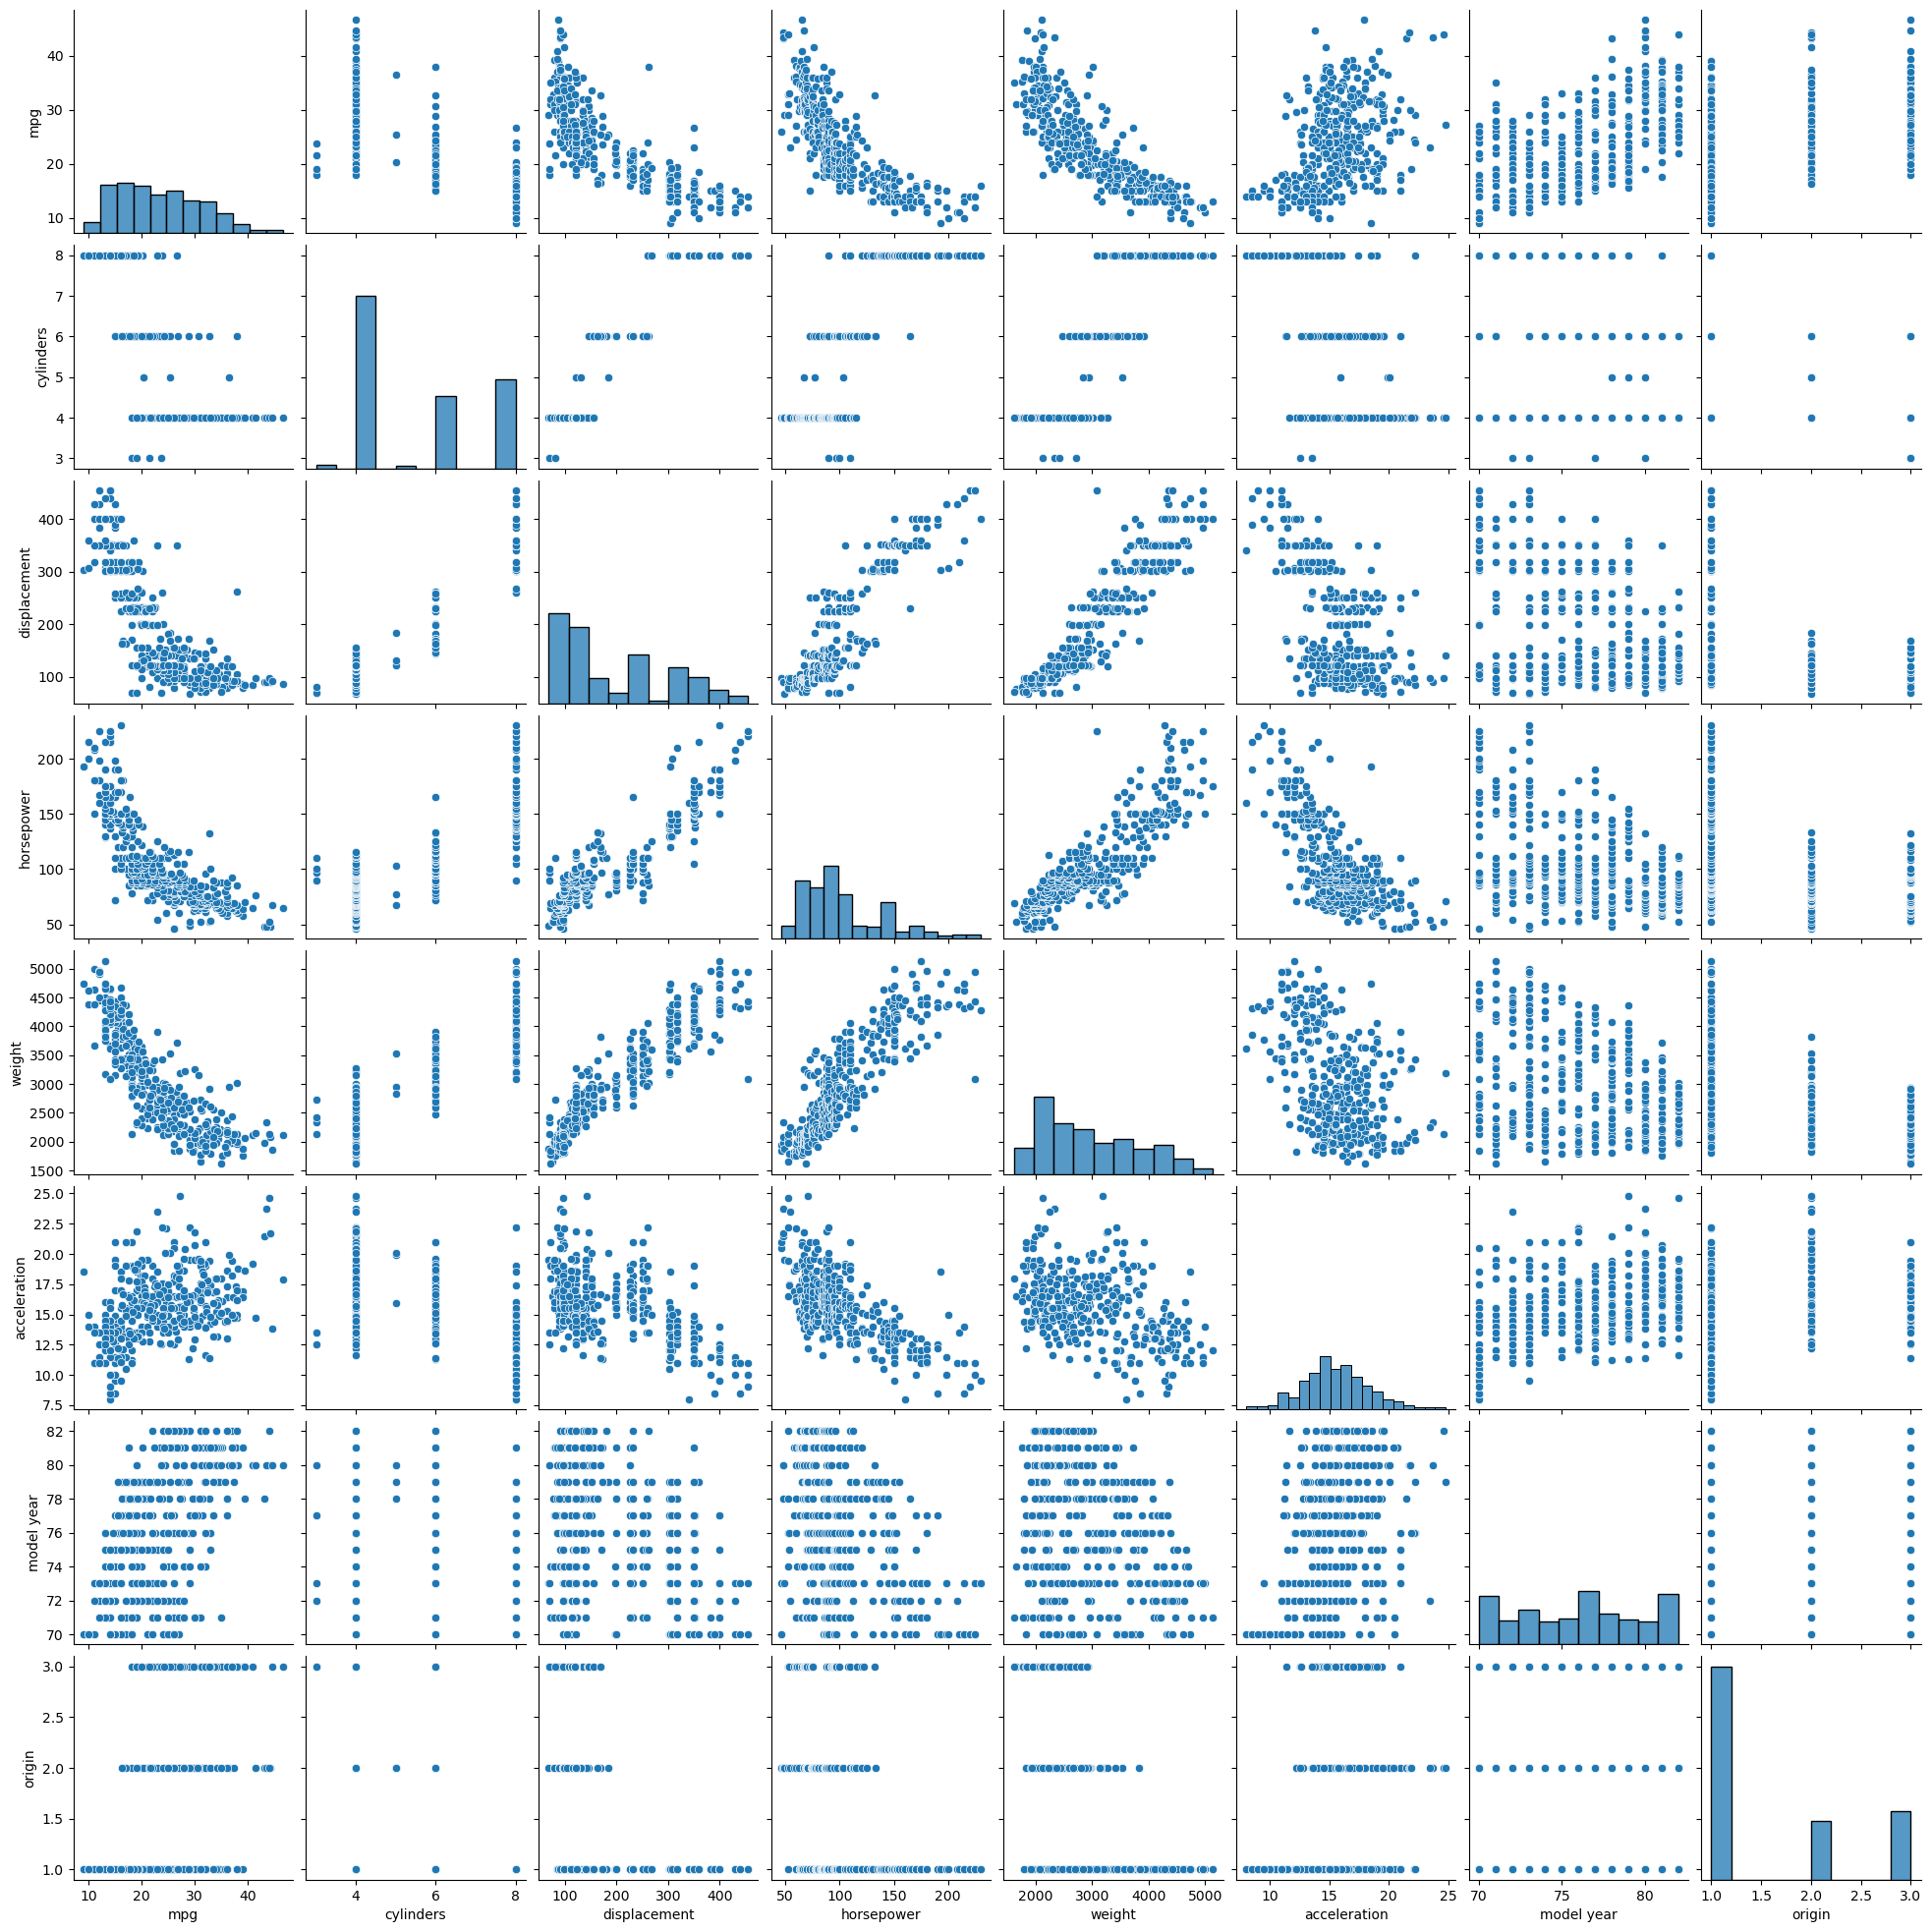

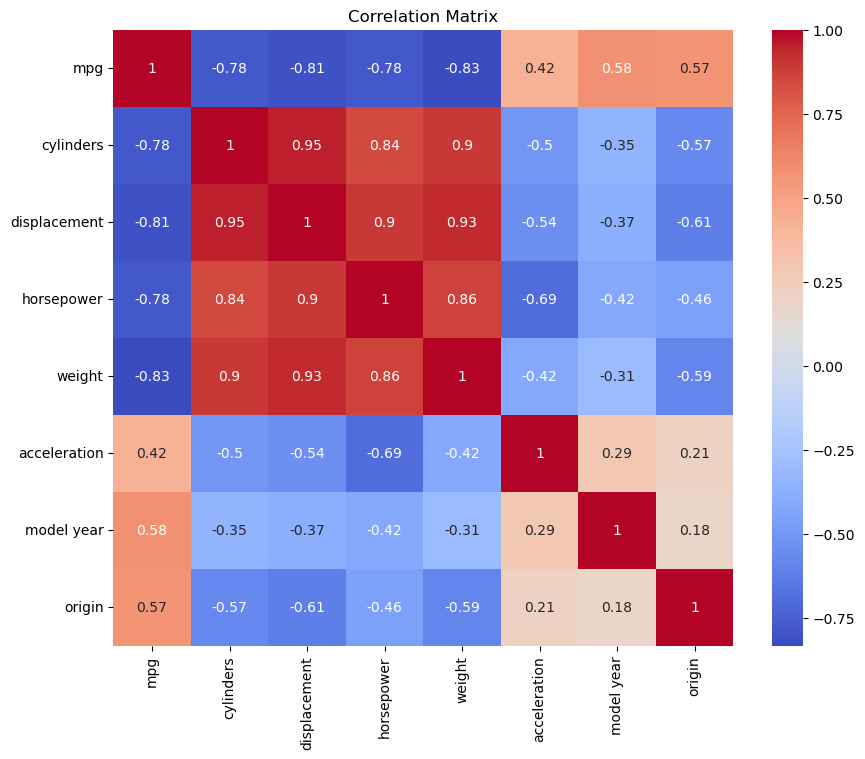

In [74]:
sns.pairplot(df)
plt.show()
correlation_matrix = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm')
plt.title('Correlation Matrix')
plt.show()

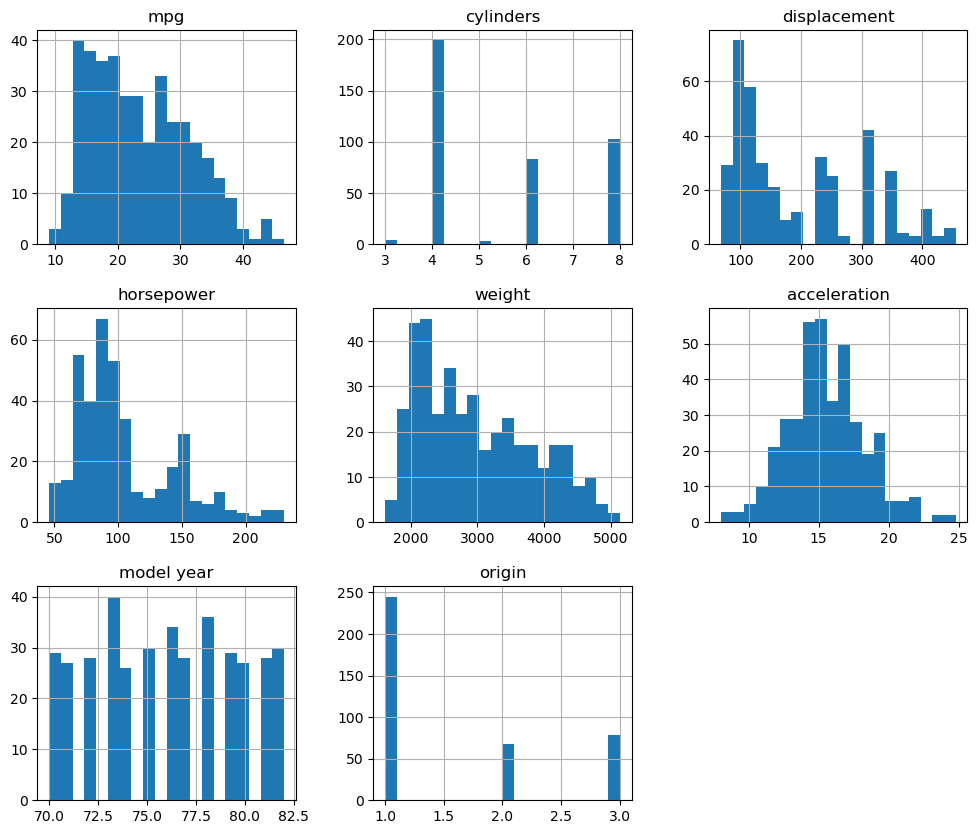

<function matplotlib.pyplot.show(close=None, block=None)>

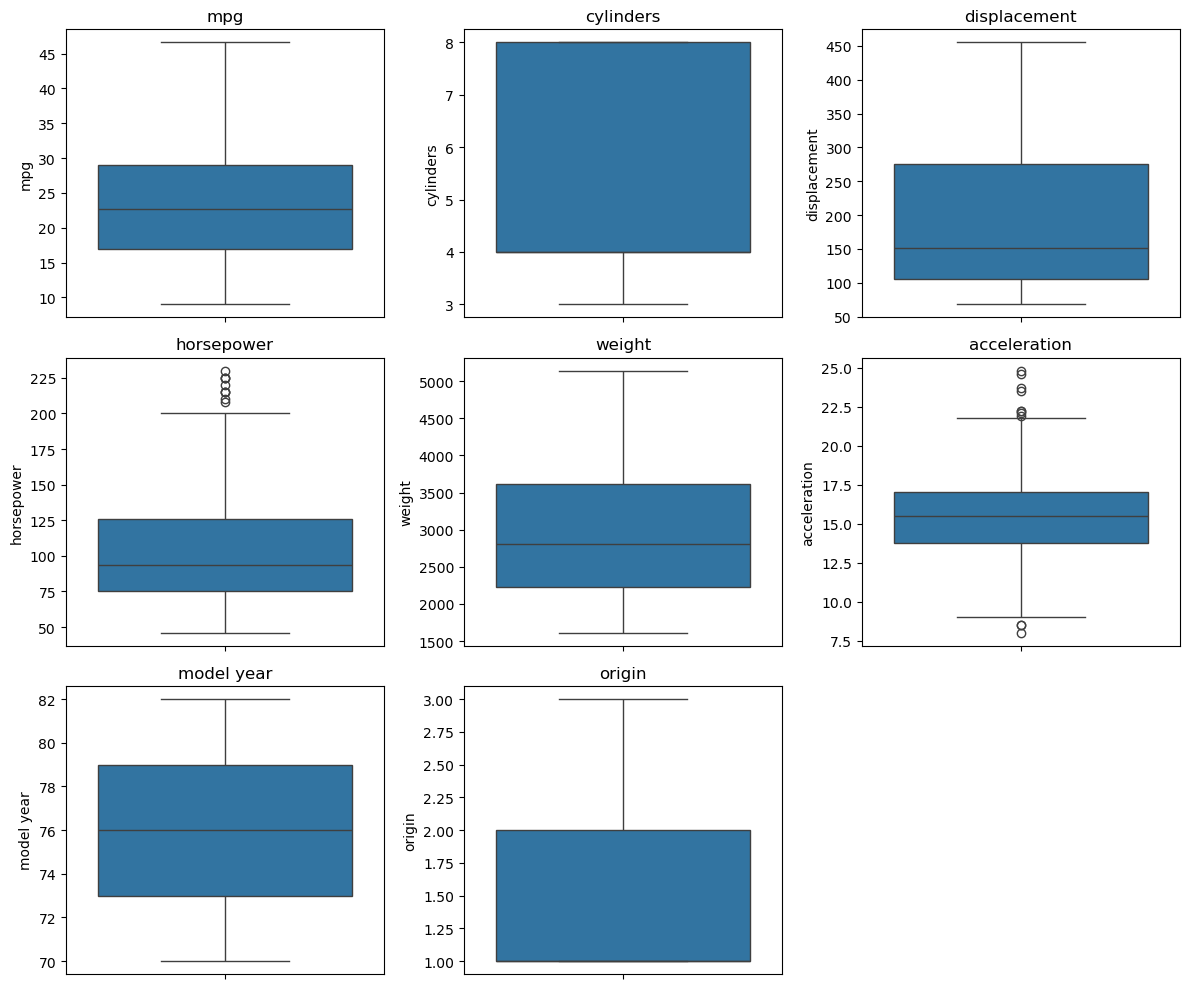

In [76]:
df.hist(figsize = (12,10), bins = 20)
plt.show()
plt.figure(figsize=(12,10))
for i, column in enumerate(df.columns):
    plt.subplot(3,3,i+1)
    sns.boxplot(df[column])
    plt.title(column)
plt.tight_layout()
plt.show

In [78]:
X = df[['cylinders']] #Predictor
Y = df[['displacement']] #Target

In [80]:
#Splitting in training and testing...dont change format
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42) 

In [82]:
#Create and train the model
simple_model = LinearRegression()
simple_model.fit(X_train,Y_train)

LinearRegression()

Mean Squared Error: 1167.6121081893818
R^2 score: 0.8944972281532668


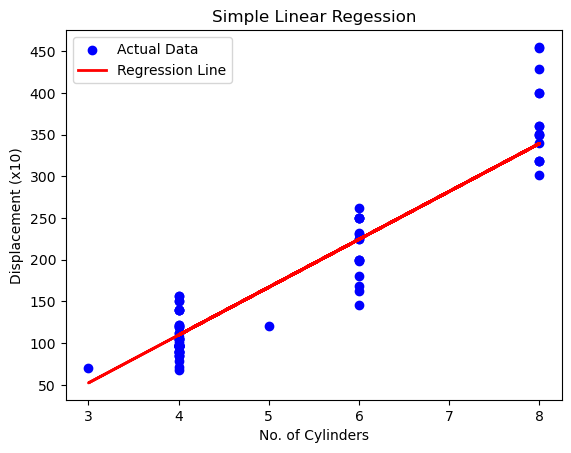

In [88]:
#Predictions
Y_pred = simple_model.predict(X_test)

#Evaluate the model
print(f'Mean Squared Error: {mean_squared_error(Y_test, Y_pred)}')
print(f'R^2 score: {r2_score(Y_test, Y_pred)}')

#Plot the regression line
plt.scatter(X_test, Y_test, color = 'blue', label = 'Actual Data')
plt.plot(X_test, Y_pred, color = 'red', linewidth = 2, label = 'Regression Line')
plt.xlabel('No. of Cylinders')
plt.ylabel('Displacement (x10)')
plt.title('Simple Linear Regession')
plt.legend()
plt.show()


In [102]:
total_cylinders = float(input("Enter the No. of Cylinders: "))
total_cylinders_array = np.array([[total_sqft]])
predicted_displacement = simple_model.predict(total_cylinders_array)
print(f"The predicted displacement for {total_cylinders} is {predicted_displacement[0][0]*10:.2f} cc")

Enter the No. of Cylinders:  10


The predicted displacement for 10.0 is 4538.91 cc


In [104]:
X_multi = df[['cylinders', 'displacement', 'horsepower', 'weight']]
Y_multi = df['mpg']

In [108]:
X_train_multi, X_test_multi, Y_train_multi, Y_test_multi = train_test_split(X_multi, Y_multi, test_size = 0.2, random_state = 42)

In [110]:
multi_model = LinearRegression()
multi_model.fit(X_train_multi, Y_train_multi)

LinearRegression()

In [112]:
Y_pred_multi = multi_model.predict(X_test_multi)
print(f'Mean Squared Error: {mean_squared_error(Y_test_multi, Y_pred_multi)}')
print(f'R^2 score: {r2_score(Y_test_multi, Y_pred_multi)}')

Mean Squared Error: 28.103034425661555
R^2 score: 0.6052017221770295


In [114]:
#Display the coefficients of the model
coefficients = pd.DataFrame(multi_model.coef_, X_multi.columns, columns = ['Coefficients'])
print(coefficients)

              Coefficients
cylinders        -0.257110
displacement     -0.006625
horsepower       -0.034566
weight           -0.004968
